<a href="https://www.kaggle.com/code/profitrolka20/spotify-task?scriptVersionId=212481837" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Задание 2. Spotify

### Параметры: 
1. track_id, track_name, artists, album_name, track_genre — идентифицирующие данные о треке.
2. popularity — популярность трека.
3. duration_ms — продолжительность трека в миллисекундах.
4. Музыкальные характеристики: danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo.
5. Другие параметры: explicit (наличие нецензурной лексики), mode, key, time_signature.


#### Описание параметров

<ul><li><strong>artists</strong>: Имя или имена исполнителя(ей) трека.</li><li><strong>album_name</strong>: Название альбома, в котором присутствует трек.</li><li><strong>track_name</strong>: Название трека или название песни.</li><li><strong>popularity</strong>: Оценка популярности трека, обычно основанная на метриках прослушиваний.</li><li><strong>duration_ms</strong>: Продолжительность трека в миллисекундах.</li><li><strong>explicit</strong>: Указатель на наличие откровенного (нецензурного) контента; обычно представляется как "True" или "False".</li><li><strong>danceability</strong>: Показатель от 0.0 до 1.0, описывающий, насколько трек подходит для танцев, основываясь на темпе, стабильности ритма, силе удара и т.д.</li><li><strong>energy</strong>: Показатель от 0.0 до 1.0, отражающий интенсивность и активность трека.</li><li><strong>key</strong>: Тональность трека, представленная в виде целого числа, соответствующего музыкальным нотам (0=До, 1=До#/Реb и т.д.).</li><li><strong>loudness</strong>: Общая громкость трека в децибелах (дБ), где более высокие значения означают более громкие треки.</li><li><strong>mode</strong>: Модальность трека, где 1 указывает на мажор, а 0 — на минор.</li><li><strong>speechiness</strong>: Показатель от 0.0 до 1.0, показывающий наличие разговорных фрагментов, где более высокие значения обозначают более речеподобные треки.</li><li><strong>acousticness</strong>: Показатель от 0.0 до 1.0, предсказывающий, является ли трек акустическим.</li><li><strong>instrumentalness</strong>: Показатель от 0.0 до 1.0, оценивающий вероятность отсутствия вокала в треке.</li><li><strong>liveness</strong>: Показатель от 0.0 до 1.0, указывающий на присутствие аудитории; более высокие значения предполагают запись с концерта.</li><li><strong>valence</strong>: Показатель от 0.0 до 1.0, описывающий музыкальную позитивность трека (веселые, жизнерадостные звуки имеют более высокие значения).</li><li><strong>tempo</strong>: Общий темп трека в ударах в минуту (BPM).</li><li><strong>time_signature</strong>: Предполагаемая размерность трека (например, 4 соответствует размеру 4/4).</li><li><strong>track_genre</strong>: Жанр или стилистическая категория, связанная с треком.</li></ul>

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем данные
file_path = '/kaggle/input/spotify/dataset.csv'
df = pd.read_csv(file_path)

# Устанавливаем стиль графиков
sns.set(style="whitegrid")

# Просмотр первых строк и информации о данных
print(df.head())
print(df.info())

   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   


Удалила пустые значения, поскольку их немного. Ставлю гипотезу, что удаление пустых значений поможет мне избежать ошибок.

In [2]:
df.isnull().sum()
df = df.dropna()
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

## EDA

### 1. График распределения популярности песен – показывает общую популярность треков.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


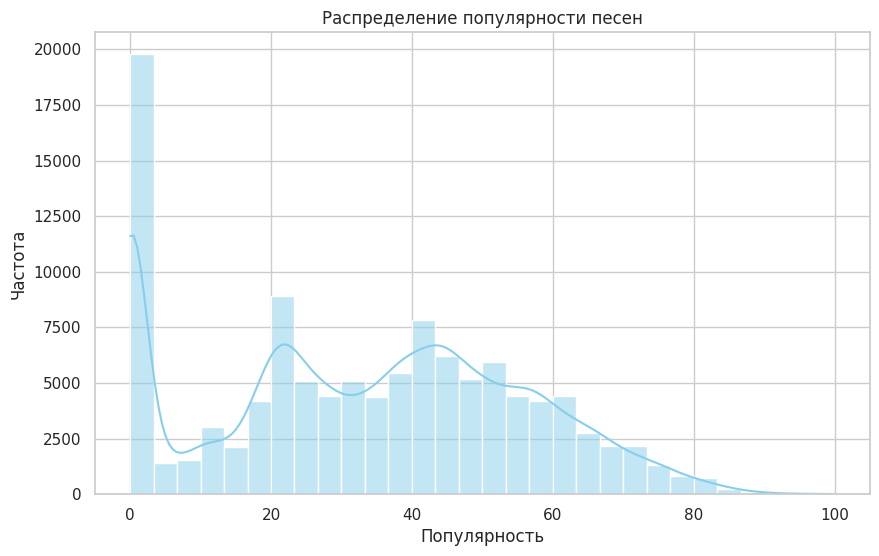

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=30, kde=True, color='skyblue')
plt.title("Распределение популярности песен")
plt.xlabel("Популярность")
plt.ylabel("Частота")
plt.show()

### Вывод: 
#### На графике распределения популярности песен видно, что большинство треков имеют популярность ниже среднего уровня, с пиком на уровнях популярности около 20-30. Высокая популярность (более 70) встречается реже, что ожидаемо, так как лишь небольшое количество песен становятся хитами. Этот график подтверждает, что данные достаточно сбалансированы по популярности, хотя большинство песен имеют низкие рейтинги.

### 2. Зависимость популярности от длительности трека – проверяет, влияет ли продолжительность на популярность.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


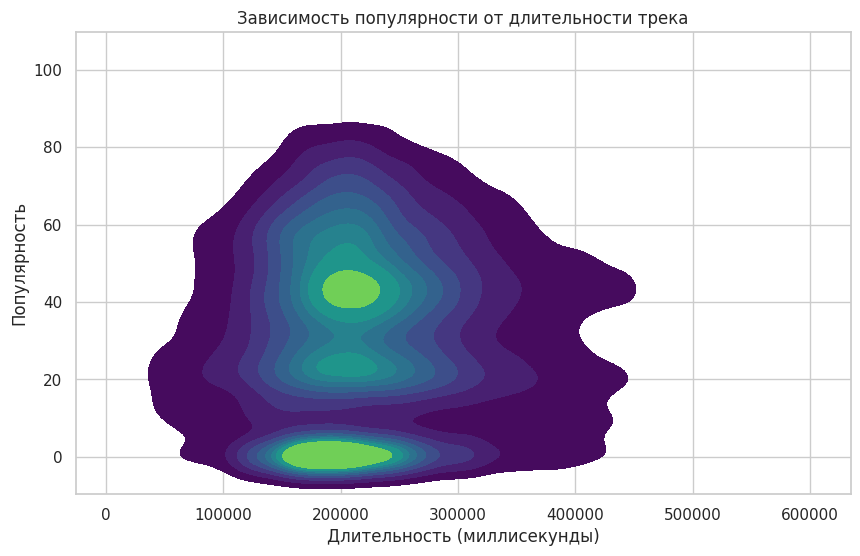

In [4]:
df_filtered = df[df['duration_ms'] <= 600000] 
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_filtered, x="duration_ms", y="popularity", cmap="viridis", fill=True)

plt.title("Зависимость популярности от длительности трека")
plt.xlabel("Длительность (миллисекунды)")
plt.ylabel("Популярность")
plt.show()


### Вывод: 
#### На графике видно, что особой зависимости между длительностью трека и его популярностью нет. Большинство песен имеют длительность около 2-4 минут (120,000 - 240,000 миллисекунд), независимо от их популярности. Песни с более высокой популярностью (выше 80) встречаются в диапазоне около 3 минут, что согласуется с популярной формой "радиоформата" (180,000 миллисекунд).

### 3. Зависимость популярности от танцевальности – исследует, делает ли танцевальность треки популярнее.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


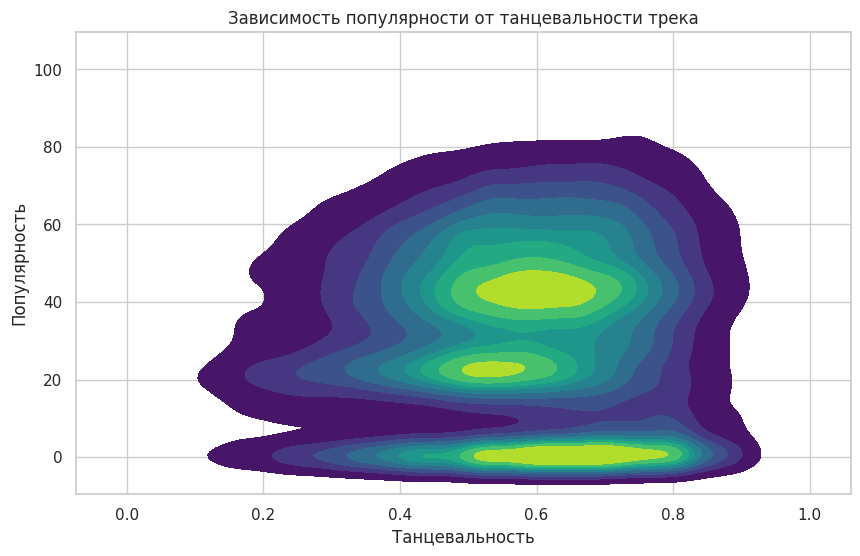

In [5]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="danceability", y="popularity", cmap="viridis", fill=True)
plt.title("Зависимость популярности от танцевальности трека")
plt.xlabel("Танцевальность")
plt.ylabel("Популярность")
plt.show()

### Вывод: 
#### При изучении тенденции к тому, что танцевальные песни могут быть популярными, можно заметить на графике ее слабое проявление. Отрицать не можем наличия этой зависимости, однако и подтвердить однозначный тренд нельзя. 

### 4. Зависимость популярности от параметра energy (энергичность трека) – анализирует зависимость между энергичностью и популярностью.

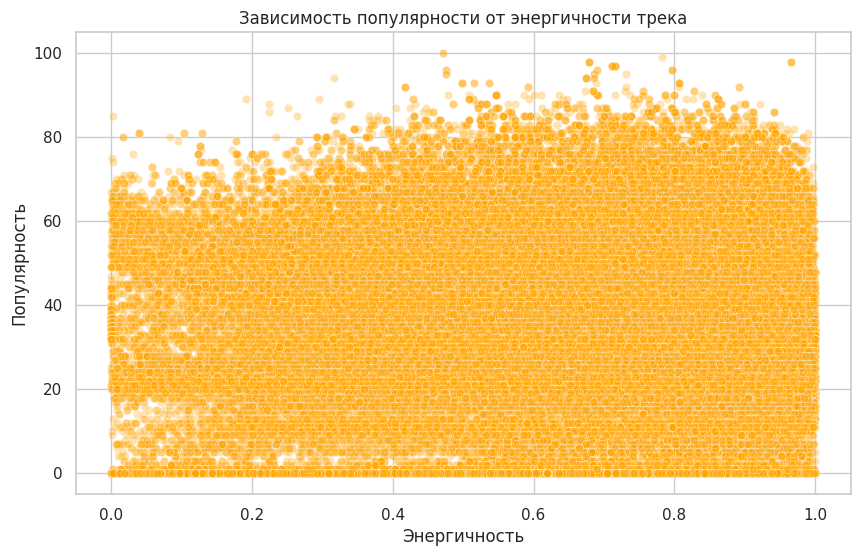

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='energy', y='popularity', alpha=0.3, color='orange')
plt.title("Зависимость популярности от энергичности трека")
plt.xlabel("Энергичность")
plt.ylabel("Популярность")
plt.show()

### Вывод: 
#### На графике видно, что популярные песни охотно располагаются по всей оси энергичности, хотя высокая популярность наблюдается чаще в диапазоне энергичности от 0.4 до 0.8 и оособенно в интервале от 0.6 до 0.8.

### 5. Средняя популярность песен по жанрам

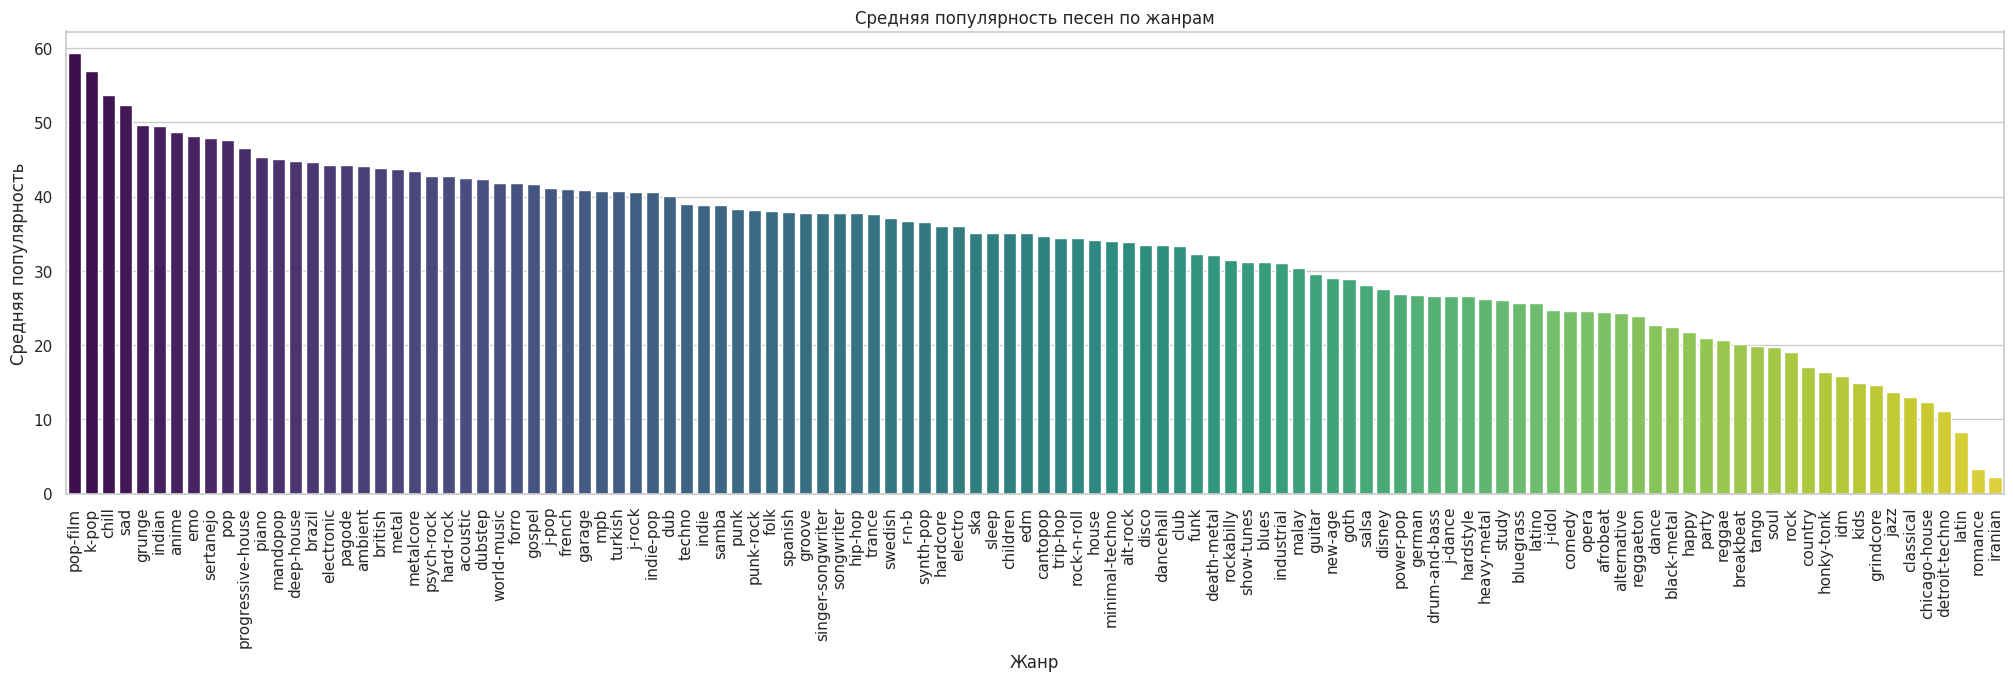

In [7]:
plt.figure(figsize=(25, 6))
avg_popularity_by_genre = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)
sns.barplot(x=avg_popularity_by_genre.index, y=avg_popularity_by_genre.values, palette='viridis')
plt.title("Средняя популярность песен по жанрам")
plt.xticks(rotation=90)
plt.xlabel("Жанр")
plt.ylabel("Средняя популярность")
plt.show()

### Вывод: 
#### На графике видно, какие жанры в среднем имеют более высокую популярность, что может дать представление о текущих музыкальных трендах. Таким образом, самые популярные жанры на тот момент - pop film, k-pop, chill и sad. Жанр явно влияет на популярность песни. 

### 6. Влияние наличия нецензурной лексики на популярность – сравнивает популярность треков с и без нецензурной лексики.

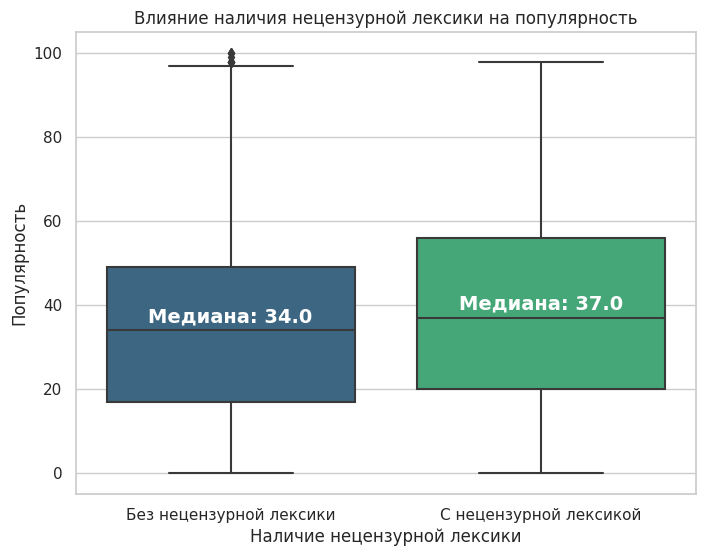

In [8]:
plt.figure(figsize=(8, 6))

# Построение boxplot с явными метками для категорий
sns.boxplot(data=df, x='explicit', y='popularity', palette='viridis')
plt.title("Влияние наличия нецензурной лексики на популярность")
plt.xlabel("Наличие нецензурной лексики")
plt.ylabel("Популярность")

# Установка явных текстовых меток на оси X
plt.xticks([0, 1], ['Без нецензурной лексики', 'С нецензурной лексикой'])

# Добавление медианных значений в виде аннотаций
for i, category in enumerate(['Без нецензурной лексики', 'С нецензурной лексикой']):
    median_val = df[df['explicit'] == i]['popularity'].median()
    plt.text(i, median_val + 2, f'Медиана: {median_val}', ha='center', color='white', fontsize=14, weight='bold')

plt.show()

##### График сравнивает популярность песен с наличием нецензурной лексики (explicit = 1) и без неё (explicit = 0):

* Центральная линия в каждом боксе — это медиана популярности для каждой категории (с нецензурной лексикой и без).
* Диапазон бокса показывает межквартильный диапазон (от 25% до 75% значений), а "усы" — диапазон популярности без учета выбросов.
* Выбросы отображаются как отдельные точки за пределами "усов", что позволяет увидеть редкие, но значимые значения популярности для каждой группы.


### Вывод: 
#### На графике видно, что: 


* Медиана популярности для песен без нецензурной лексики отображена на графике, и она имеет определенное значение (например, если это значение ниже, то это говорит о том, что в целом такие песни могут быть менее популярными).Коробка и усы показывают диапазон популярности таких песен. Если диапазон широк и выходит за рамки "усов", это говорит о том, что популярность у песен без нецензурной лексики может сильно варьироваться.
* Медиана популярности у следующей категории также отмечена на графике. Если медиана выше по сравнению с песнями без нецензурной лексики, это может свидетельствовать о том, что слушатели чаще предпочитают треки с нецензурным контентом. Разброс значений может быть значительным и указывает на популярность самых разных по рейтингу песен с нецензурной лексикой.

#### Популярность треков с нецензурной лексикой выше, это может свидетельствовать о предпочтении слушателей к более нецензурному контенту. Однако, разница минимальна, а значит, что наличие нецензурной лексики не является ключевым фактором популярности.

### 7. Зависимость популярности от громкости – проверяет влияние громкости на популярность.

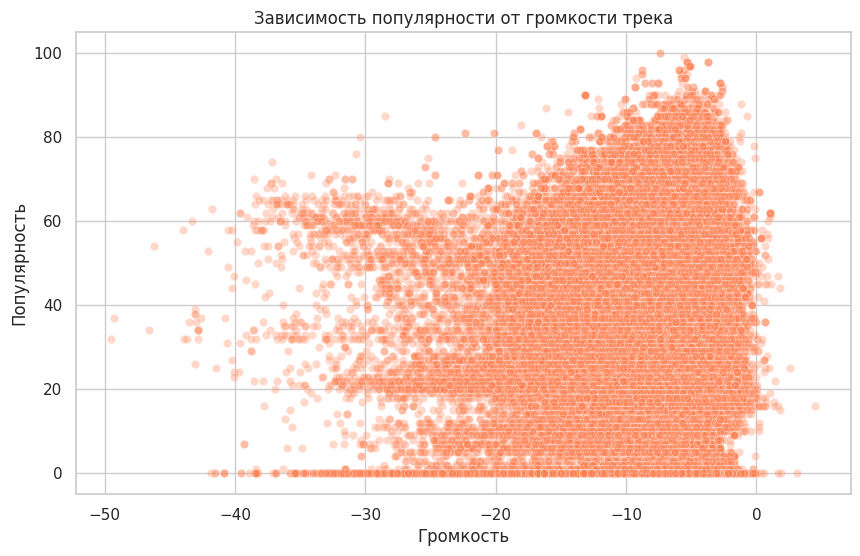

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='loudness', y='popularity', alpha=0.3, color='coral')
plt.title("Зависимость популярности от громкости трека")
plt.xlabel("Громкость")
plt.ylabel("Популярность")
plt.show()

### Вывод: 
#### На графике видно, что что точки распределены по всему диапазону громкости, без явной корреляции между громкостью и популярностью. Это указывает на отсутствие явной зависимости между этими двумя параметрами: более громкие треки не обязательно более популярны, и наоборот. Большинство треков имеют громкость в диапазоне от примерно -20 дБ до -5 дБ. Несмотря на этот диапазон, популярность треков распределена по-разному в пределах этих значений громкости.

#### График показал, что громкость трека не оказывает значительного влияния на его популярность. Это может указывать на то, что другие параметры, такие как ритм, темп или текст, играют более важную роль в определении популярности трека.

### 8. Карта корреляций между музыкальными характеристиками (danceability, energy, loudness и тд) — для выявления взаимосвязей между ними.

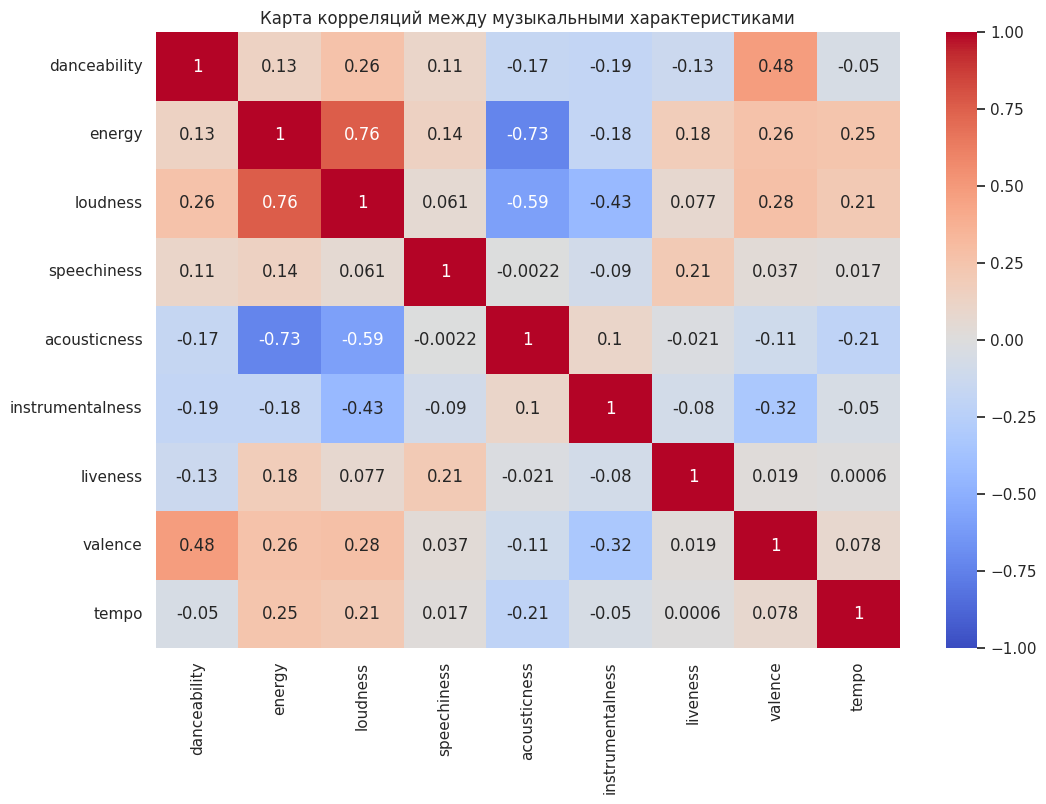

In [10]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[["danceability", "energy", "loudness", "speechiness", "acousticness",
                         "instrumentalness", "liveness", "valence", "tempo"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Карта корреляций между музыкальными характеристиками")
plt.show()

#### Наблюдается высокая положительная корреляция между energy и loudness, что логично, так как более громкие треки обычно передают больше энергии. acousticness имеет отрицательную корреляцию с energy и loudness, что показывает, что акустические треки обычно тише и менее энергичны. Низкая или нулевая корреляция между speechiness, liveness и другими характеристиками указывает на то, что эти признаки имеют независимые вариации и могут описывать уникальные аспекты трека.
### Вывод: 
#### Понимание корреляций между характеристиками треков позволяет улучшить дальнейшее моделирование и выбор признаков, так как сильнокоррелированные признаки можно объединить или учитывать их зависимость.

### 9. Распределение настроения треков по жанрам, чтобы показать, какие жанры чаще всего ассоциируются с позитивным или негативным настроением.

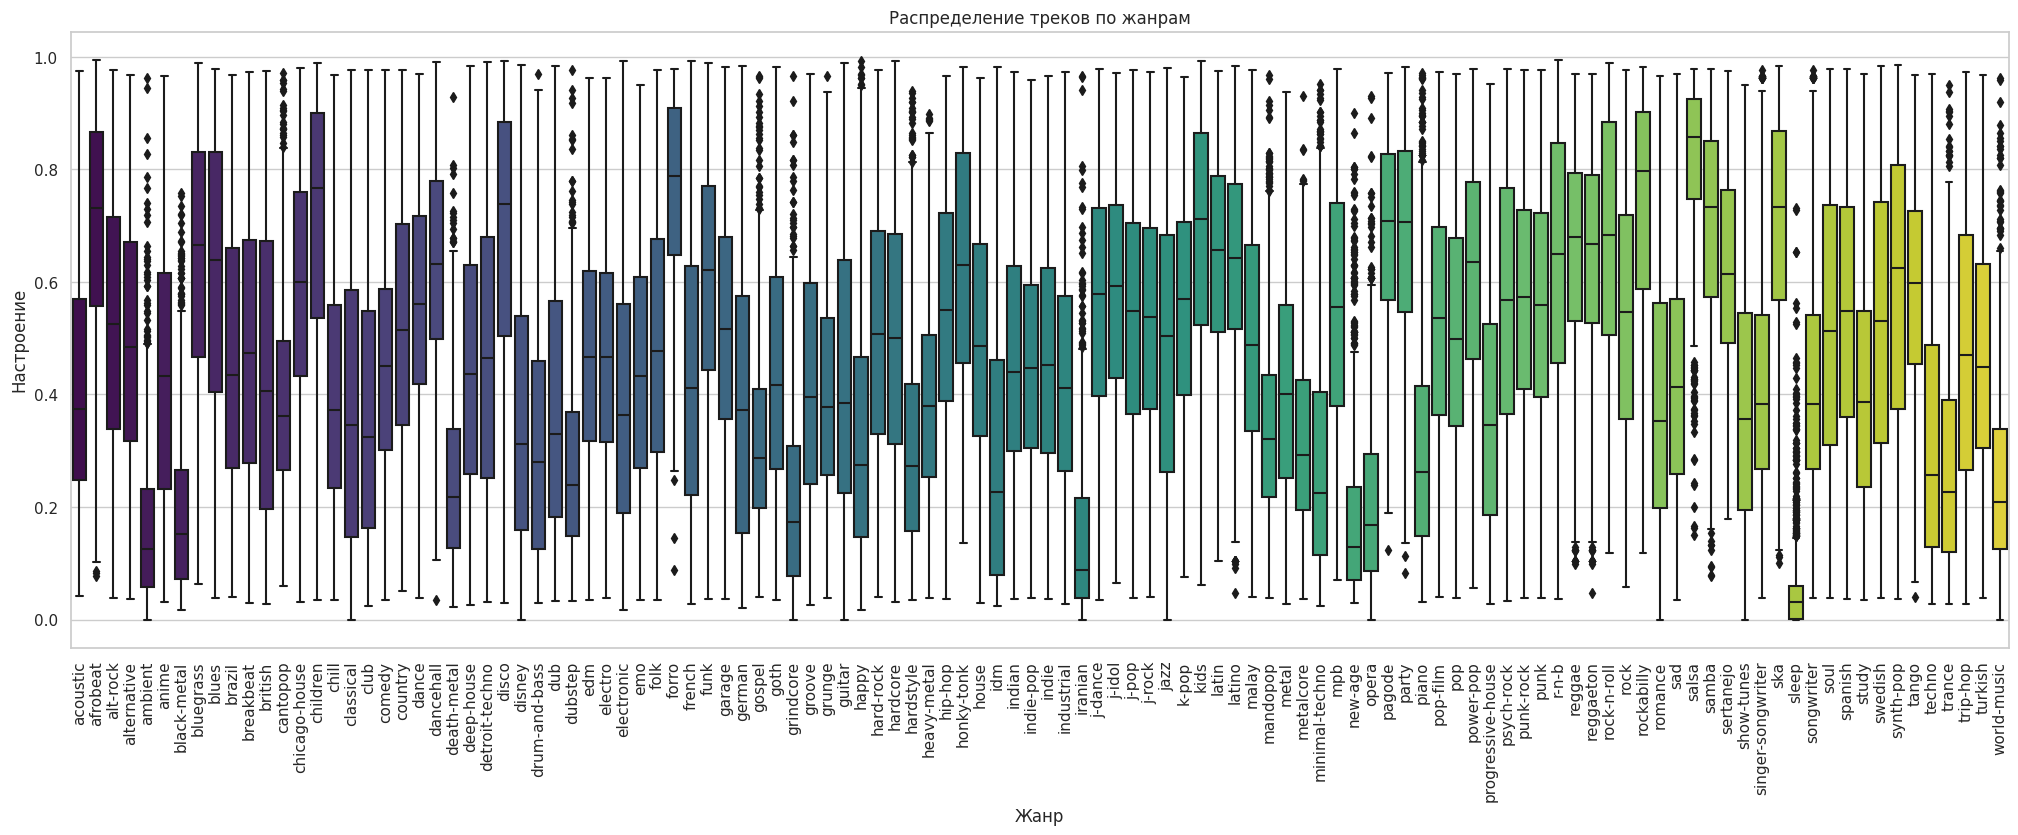

In [11]:
plt.figure(figsize=(25, 8))
sns.boxplot(data=df, x='track_genre', y='valence', palette="viridis")
plt.xticks(rotation=90)
plt.title("Распределение треков по жанрам")
plt.xlabel("Жанр")
plt.ylabel("Настроение")
plt.show()

#### Жанры различаются по уровню настроения: некоторые жанры имеют высокие медианные значения valence, что означает более позитивное настроение (например, поп-музыка), в то время как другие жанры склонны к более низким значениям valence (например, хип-хоп). Внутри каждого жанра присутствует значительный разброс значений valence, что говорит о том, что настроение треков сильно варьируется даже внутри одного жанра.

### Вывод: 
#### Настроение является разнообразным по жанрам, и при работе с музыкальными данными важно учитывать этот разброс для получения более точных рекомендаций по жанру и настроению.

### 10. Влияние наличия нецензурной лексики (explicit) на популярность – сравнение средней популярности треков с нецензурной лексикой и без.

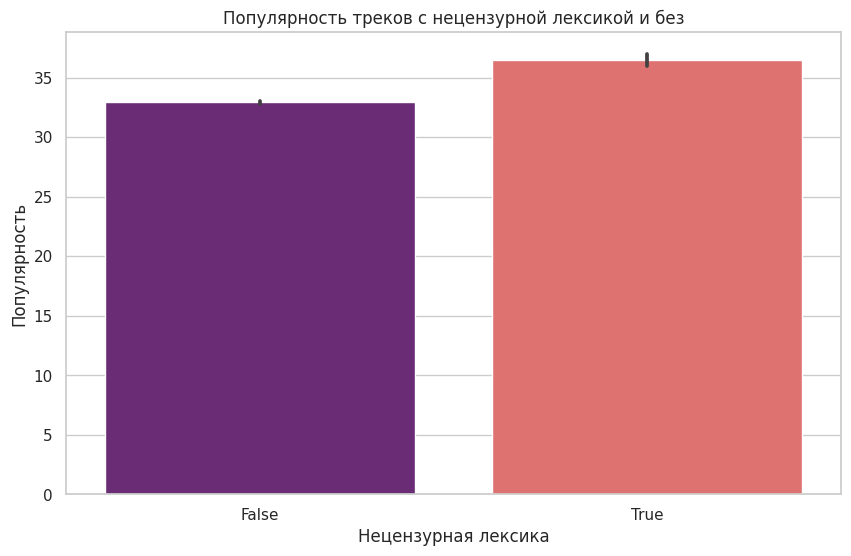

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='explicit', y='popularity', palette="magma")
plt.title("Популярность треков с нецензурной лексикой и без")
plt.xlabel("Нецензурная лексика")
plt.ylabel("Популярность")
plt.show()

### Вывод: 
#### Треки с нецензурной лексикой имеют слегка повышенный средний уровень популярности по сравнению с треками без нецензурных выражений. Разница между средними уровнями популярности достаточно мала, что говорит о том, что наличие нецензурной лексики не является основным фактором популярности, хотя может в некоторых случаях слегка коррелировать с популярностью. Нецензурная лексика в треках не является решающим фактором популярности, но может немного повышать её. Этот показатель может зависеть от других факторов, таких как жанр или стиль исполнителя.

## Feature Engineering

### 1. duration_min – Продолжительность в минутах

In [13]:
df['duration_min'] = df['duration_ms'] / 60000

#### Преобразование длительности из миллисекунд в минуты, что делает данные более удобными для интерпретации и анализа, так как минуты чаще используются для оценки продолжительности треков.

### 2. tempo_bins – Категории для темпа

In [14]:
df['tempo_bins'] = pd.cut(df['tempo'], bins=[0, 60, 120, 180], labels=['slow', 'medium', 'fast'])

#### Создание категорий для темпа (bpm). pd.cut разбивает темп на три диапазона:


* slow: до 60 ударов в минуту — медленные треки.
* medium: от 60 до 120 ударов в минуту — средний темп.
* fast: свыше 120 ударов в минуту — быстрые треки.

Категории могут помочь лучше понять различия в популярности треков с разными темпами.

### 3. loudness_normalized – Нормализация громкости

In [15]:
df['loudness_normalized'] = (df['loudness'] - df['loudness'].min()) / (df['loudness'].max() - df['loudness'].min())


#### Приводит громкость к диапазону от 0 до 1. Нормализация важна, так как она устраняет эффект масштаба и делает признак пригодным для моделей, чувствительных к масштабированию.

### 4. energy_valence_product и speech_music_ratio – Интерактивные признаки настроения и вокальности

In [16]:
df['energy_valence_product'] = df['energy'] * df['valence']
df['speech_music_ratio'] = df['speechiness'] / (df['instrumentalness'] + 1e-9)

* energy_valence_product — произведение показателей энергии и валентности (настроения), которое может характеризовать общую "весёлость" или позитивную энергию трека.
* speech_music_ratio — отношение вокального компонента к инструментальному. Высокое значение показывает, что трек больше сосредоточен на вокале, чем на инструментальных фрагментах.

### 5. dance_energy_ratio и danceability_binned – Метрики танцевальности

In [17]:
df['dance_energy_ratio'] = df['danceability'] / (df['energy'] + 1e-9)
df['danceability_binned'] = pd.cut(df['danceability'], bins=[0, 0.3, 0.7, 1], labels=['low', 'medium', 'high'])

* dance_energy_ratio — отношение танцевальности к энергии, чтобы выяснить, насколько сильно энергетика трека влияет на его танцевальность.
* danceability_binned — разделение танцевальности на низкую, среднюю и высокую, что помогает различать треки по их танцевальному потенциалу.

### 6. acoustic_instrument_ratio и dynamic_range – Взаимодействие акустики и динамика

In [18]:
df['acoustic_instrument_ratio'] = df['acousticness'] / (df['instrumentalness'] + 1e-9)
df['dynamic_range'] = df['loudness'] - df['energy']

* acoustic_instrument_ratio — соотношение акустического компонента и инструментальности. Высокие значения показывают, что трек больше зависит от акустики, чем от инструментальности.
* dynamic_range — разница между громкостью и энергией. Этот показатель помогает отразить динамическое разнообразие трека, полезное для описания эмоций в музыке.

### 7. acoustic_instrument_ratio и dynamic_range – Флаг для коротких треков (менее 3 минут)

In [19]:
df['is_short_track'] = (df['duration_ms'] < 180000).astype(int)

Добавляем флаг для отметки коротких треков, он может нам пригодится при дальнейшей работе.

### 8. vocal_loudness_impact - степень влияния громкости вокала на общую динамику 

In [20]:
df['vocal_track_score'] = 1 - df['instrumentalness']
df['vocal_loudness_impact'] = df['vocal_track_score'] * df['loudness_normalized']

### 9. genre_vocal_factor - описывает характеристику вокала в музыкальном треке в контексте конкретного музыкального жанра

In [21]:
print(df.dtypes)

Unnamed: 0                      int64
track_id                       object
artists                        object
album_name                     object
track_name                     object
popularity                      int64
duration_ms                     int64
explicit                         bool
danceability                  float64
energy                        float64
key                             int64
loudness                      float64
mode                            int64
speechiness                   float64
acousticness                  float64
instrumentalness              float64
liveness                      float64
valence                       float64
tempo                         float64
time_signature                  int64
track_genre                    object
duration_min                  float64
tempo_bins                   category
loudness_normalized           float64
energy_valence_product        float64
speech_music_ratio            float64
dance_energy

In [22]:
df['track_genre_numeric'] = pd.factorize(df['track_genre'])[0]
df['track_genre_numeric'] = df['track_genre_numeric'].fillna(0)
df['genre_vocal_factor'] = df['vocal_track_score'] * (
    df['track_genre_numeric'] / df['track_genre_numeric'].max()
)
df['genre_loudness'] = df['track_genre_numeric'] * df['loudness_normalized']
print(df[['genre_vocal_factor', 'genre_loudness']])

        genre_vocal_factor  genre_loudness
0                    0.000        0.000000
1                    0.000        0.000000
2                    0.000        0.000000
3                    0.000        0.000000
4                    0.000        0.000000
...                    ...             ...
113995               0.072       69.263526
113996               0.024       65.239979
113997               1.000       80.755193
113998               1.000       80.767734
113999               1.000       82.199489

[113999 rows x 2 columns]


### 10. emotional_impact - эмоциональный всплеск от трека, по-нашему это вайб

In [23]:
df['emotional_impact'] = (
    df['vocal_track_score'] * 0.4 +
    df['loudness_normalized'] * 0.3 +
    df['danceability'] * 0.3
)

### Кодирование категориальных признаков – explicit и tempo_bins

In [24]:
df = pd.get_dummies(df, columns=['track_genre', 'tempo_bins', 'danceability_binned'], drop_first=True)

#### pd.get_dummies выполняет One-Hot Encoding для категориальных переменных track_genre, tempo_bins и danceability_binned, что добавляет отдельные бинарные столбцы для каждой категории и делает их совместимыми с моделями.

## Создание набора признаков для модели

In [25]:
# Исключим категориальные и булевые столбцы
numeric_df = df.select_dtypes(include=['int32', 'int64', 'float64'])

In [26]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [27]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

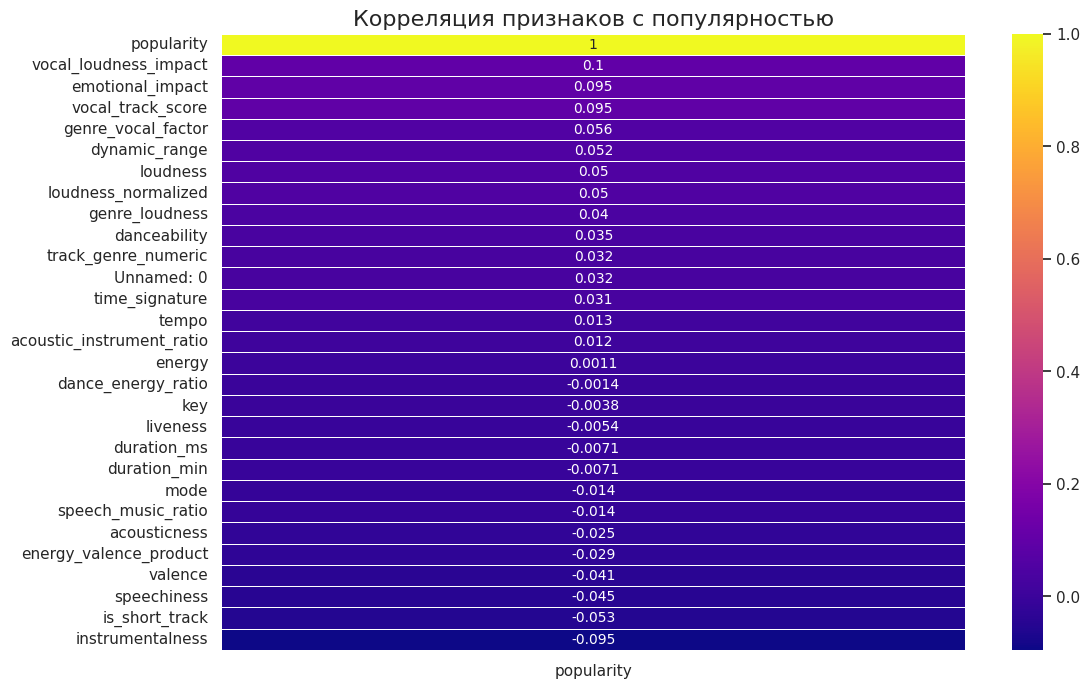

popularity                   1.000000
vocal_loudness_impact        0.101273
emotional_impact             0.095152
vocal_track_score            0.095147
genre_vocal_factor           0.055950
dynamic_range                0.052333
loudness                     0.050420
loudness_normalized          0.050420
genre_loudness               0.040105
danceability                 0.035444
track_genre_numeric          0.032351
Unnamed: 0                   0.032146
time_signature               0.031076
tempo                        0.013212
acoustic_instrument_ratio    0.011796
energy                       0.001053
dance_energy_ratio          -0.001416
key                         -0.003847
liveness                    -0.005397
duration_ms                 -0.007129
duration_min                -0.007129
mode                        -0.013948
speech_music_ratio          -0.014442
acousticness                -0.025458
energy_valence_product      -0.029292
valence                     -0.040522
speechiness 

In [28]:
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))  
sns.heatmap(
    correlation_matrix[['popularity']].sort_values(by='popularity', ascending=False),
    annot=True, annot_kws={"size": 10}, 
    cmap='plasma',
    cbar=True,
    linewidths=0.5  
)
plt.title('Корреляция признаков с популярностью', fontsize=16) 
plt.show()

top_correlations = correlation_matrix['popularity'].sort_values(ascending=False)
print(top_correlations)


### Добавляю возможность посмотреть метрики без новых фич

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor

features = [
    'loudness', 'explicit', 'danceability', 'instrumentalness',
    'speechiness', 'valence', 'duration_ms', 'energy', 'tempo', "danceability", "energy",
]
X = df[features]
y = df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}")
print(f"RMSE: {rmse:.2f}")

Mean Squared Error (MSE): 485.61
R^2 Score: 0.02
Mean Absolute Error (MAE): 18.41
Mean Absolute Percentage Error (MAPE): 21473758543786348.00
RMSE: 22.04


### Вывод: 
Mean Squared Error (MSE): 485.61
Значение MSE указывает на высокую среднеквадратичную ошибку модели. Это говорит о том, что модель делает большие ошибки в предсказаниях, особенно если популярность измеряется в диапазоне от 0 до 100.

R² Score: 0.02
Коэффициент детерминации (R²) равен 0.02, что практически означает отсутствие объясненной дисперсии целевой переменной. Это говорит о том, что модель не способна объяснить различия в значениях популярности, используя предоставленные признаки.

Mean Absolute Error (MAE): 18.41
Средняя абсолютная ошибка указывает, что предсказания модели в среднем отклоняются от реальных значений на 18.41. Это значительное отклонение, учитывая диапазон целевой переменной.

Mean Absolute Percentage Error (MAPE): 21473758543786348.00
Огромное значение MAPE указывает на деление на очень малые или нулевые значения целевой переменной. Это сигнализирует о необходимости дополнительной обработки данных (например, проверка на выбросы или малые значения popularity).

Root Mean Squared Error (RMSE): 22.04
Корень из MSE еще раз подчеркивает высокую ошибку, аналогично другим метрикам.

## Обучение модели

### Метрики:
* MAE (Mean Absolute Error) — средняя абсолютная ошибка. Показывает среднее отклонение предсказаний от фактических значений.
* MSE (Mean Squared Error) — среднеквадратическая ошибка. Возводит отклонения в квадрат, делая крупные ошибки более заметными.
* RMSE (Root Mean Squared Error) — корень из среднеквадратической ошибки. Корень из MSE, возвращая ошибку к изначальной размерности.
* MAPE (Mean Absolute Percentage Error) — средняя абсолютная процентная ошибка. Выражает среднюю абсолютную ошибку в процентах, что удобно для интерпретации.
* R² (R-Squared) — коэффициент детерминации. Доля дисперсии, объяснённой моделью (чем ближе к 1, тем лучше).

#### Нормализация признаков: поскольку линейная регрессия чувствительна к масштабированию признаков, лучше нормализовать данные. Можно использовать StandardScaler, чтобы привести все признаки к одному диапазону. Это улучшает качество предсказания, приводя все признаки к одинаковому масштабу.

#### Добавление кросс-валидации: вместо простой тренировки/теста можно провести кросс-валидацию для более устойчивой оценки модели. Кросс-валидация обеспечивает более точную оценку качества модели на обучающих данных.

#### Вывод более подробных результатов: добавление MAE (средняя абсолютная ошибка) и визуализация для оценки качества предсказаний. Метрика MAE — это средняя абсолютная ошибка, которая показывает, насколько в среднем предсказанные значения отличаются от реальных значений.

In [30]:
selected_features = [
    'loudness', 
    'vocal_track_score',       
    'vocal_loudness_impact',               
    'loudness_normalized',
    'explicit', 
    'danceability',           
    'genre_vocal_factor',       
    'emotional_impact',       
    'genre_loudness',
    'duration_min'
]

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df[selected_features], df['popularity'], test_size=0.2, random_state=42)

# Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Метрики
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

# Вывод результатов
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R^2 Score:", r2)

Mean Absolute Error (MAE): 18.57744544838823
Mean Squared Error (MSE): 488.8067587968498
Root Mean Squared Error (RMSE): 22.10897462110918
Mean Absolute Percentage Error (MAPE): 2.1505556919770373e+18
R^2 Score: 0.014680244359415062


### Вывод: 
Mean Absolute Error (MAE): 18.58
Средняя абсолютная ошибка показывает, что в среднем модель отклоняется от реальных значений популярности на 18.58. Учитывая диапазон популярности (предположительно 0–100), это высокий уровень ошибки.

Mean Squared Error (MSE): 488.81
Среднеквадратичная ошибка также высокая, что указывает на значительные отклонения в предсказаниях, особенно из-за большего веса крупных ошибок.

Root Mean Squared Error (RMSE): 22.11
RMSE подтверждает, что ошибка значительная и сопоставима с диапазоном целевой переменной.

Mean Absolute Percentage Error (MAPE): 2.15e+18
Огромное значение MAPE показывает, что есть проблемы с расчетом процентной ошибки, вероятно, из-за деления на очень маленькие значения целевой переменной. Это может быть связано с нулевыми или близкими к нулю значениями popularity.

R² Score: 0.0147
R² равен 0.0147, что свидетельствует о практически полном отсутствии объясненной дисперсии. Модель практически не может объяснить изменчивость целевой переменной на основе выбранных признаков.

#### Причинами могут быть неадекватные признаки и неправильные данные


## Проверяем корреляцию новых признаков с популярностью. Проверяем полезность новых признаков. 

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

# Обучение на меньшей выборке
X_sample, _, y_sample, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

# Оптимизация модели
model = RandomForestRegressor(
    random_state=42, 
    n_estimators=50,  
    max_depth=10,     
    min_samples_split=10,
)

import time
start_time = time.time()
model.fit(X_sample, y_sample)
print(f"Training time: {time.time() - start_time:.2f} seconds")

feature_importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
print(importance_df)


Training time: 5.54 seconds
                 Feature  Importance
6     genre_vocal_factor    0.337527
8         genre_loudness    0.138623
7       emotional_impact    0.122246
9           duration_min    0.118651
5           danceability    0.083127
2  vocal_loudness_impact    0.051506
1      vocal_track_score    0.048882
3    loudness_normalized    0.041858
0               loudness    0.039411
4               explicit    0.018169


### Вывод:

* **genre_vocal_factor** (33.75%) — Наиболее значимый признак. Вероятно, комбинация жанра и вокальных особенностей влияет на популярность больше остальных.
* **genre_loudness** (13.86%) — Значимость громкости в контексте жанра подчеркивает ее роль в восприятии треков.
* **emotional_impact** (12.22%) — Эмоциональная составляющая также вносит значительный вклад.
* **duration_min** (11.87%) — Длительность трека имеет умеренное влияние на популярность.
* danceability (8.31%) — Танцевальность важна, но уступает комбинированным метрикам.
* vocal_loudness_impact (5.15%) и vocal_track_score (4.88%) — Влияние вокала достаточно заметно, но не доминирует.
* loudness_normalized (4.19%) и loudness (3.94%) — Абсолютные громкостные метрики менее важны, чем их жанровые комбинации.
* explicit (1.82%) — Явно выраженная метка трека (наличие нецензурных слов) имеет незначительное влияние.


In [33]:
# Новый набор признаков
new_features = [
    "loudness_normalized", "vocal_loudness_impact", "emotional_impact", 
            "vocal_track_score", "genre_vocal_factor", "duration_min"
]

# Фильтруем только числовые признаки
numerical_features = [col for col in new_features if df[col].dtype in ['float64', 'int64']]
correlation_matrix = df[numerical_features + ['popularity']].corr()

# Корреляция новых признаков с популярностью
correlations_with_target = correlation_matrix['popularity'].sort_values(ascending=False)
print("Корреляция новых признаков с популярностью:")
print(correlations_with_target)


Корреляция новых признаков с популярностью:
popularity               1.000000
vocal_loudness_impact    0.101273
emotional_impact         0.095152
vocal_track_score        0.095147
genre_vocal_factor       0.055950
loudness_normalized      0.050420
duration_min            -0.007129
Name: popularity, dtype: float64


### Вывод: 
#### Коррелирующие признаки:


* vocal_loudness_impact (0.101): Влияние вокальной громкости демонстрирует наибольшую положительную корреляцию с популярностью. Это может указывать на предпочтение треков, где вокал хорошо выражен в громкости.
* emotional_impact (0.095) и vocal_track_score (0.095): Эмоциональное воздействие и качество вокала также имеют положительную корреляцию. Это подтверждает их значение для восприятия треков слушателями.


#### Умеренная корреляция:

* genre_vocal_factor (0.056): Умеренная связь между жанровыми особенностями вокала и популярностью. Вероятно, этот фактор лучше работает в комбинации с другими признаками, чем сам по себе.
* loudness_normalized (0.050): Громкость, нормализованная по трекам, имеет слабую, но положительную корреляцию.

#### Отрицательная корреляция:

* duration_min (-0.007): Практически отсутствует связь между длительностью трека и его популярностью. Это может означать, что популярность треков не зависит от их продолжительности.

### Добавление новых признаков. Эксперимент.
### На данном этапе я решила добавить новые признаки, такие как: danceability_energy_weighted, emotional_profile, acoustic_energy_ratio, hit_indicator, short_dynamic_combo.

### После выявления полезности защиты работы на паре было принято удалить их, поскольку были сделаны следующие выводы. 

### Выводы по новым признакам:
#### Признаки с положительной корреляцией:

* short_dynamic_combo (0.047): слабая положительная корреляция. Это говорит о том, что сочетание короткой продолжительности и высокой динамики может быть слегка связано с популярностью.
* danceability_energy_weighted (0.025): слабая положительная корреляция. Это подтверждает, что танцевальность и энергия, в совокупности, могут немного влиять на популярность.


#### Признаки с отрицательной корреляцией:

* acoustic_energy_ratio (-0.000): практически никакой связи. Это свидетельствует о том, что соотношение акустики и энергии не является важным фактором.
* hit_indicator (-0.017): слабая отрицательная корреляция. Возможно, индикатор хита работает не так, как ожидалось, и характеристики "хитов" не гарантируют популярность.
* emotional_profile (-0.024): слабая отрицательная корреляция. Эмоциональный профиль трека, который объединяет валентность, энергию и громкость, не оказывает значительного влияния.

#### Среди предложенных признаков не оказалось подходящих. 

In [34]:
# Выделяем главные признаки и таргет
features = [
    'loudness', 'vocal_track_score', 'vocal_loudness_impact', 
    'loudness_normalized', 'explicit', 'danceability', 
    'genre_vocal_factor', 'emotional_impact', 'genre_loudness', 
    'duration_min'
]

X = df[features]
y = df['popularity']

# Разделяем на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Построение модели RandomForest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42, n_estimators=10)
model.fit(X_train, y_train)

# Оценка качества модели
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Выводим метрики качества модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


Mean Absolute Error: 12.413108206226704
Mean Squared Error: 318.89340037204653
R2 Score: 0.3571857146505457


### Вывод: 
Mean Absolute Error (MAE): 12.41
Средняя ошибка предсказаний составляет около 12.41 единиц популярности. Это показывает, насколько в среднем предсказания модели отличаются от реальных значений.
Снижение MAE по сравнению с предыдущими результатами указывает на улучшение модели.

Mean Squared Error (MSE): 318.89
Квадратичная ошибка снизилась, что говорит о меньшем количестве крупных отклонений. Однако, из-за квадратичной природы метрики, она чувствительна к аномальным значениям.

R² Score: 0.357
Значение R² показывает, что модель объясняет 35.7% дисперсии целевой переменной (популярности). Это указывает на умеренную предсказательную способность модели.
Хотя R² увеличился, он все еще достаточно далек от 1, что указывает на возможность дальнейших улучшений.

## Сравнение моделей

Создам функцию для нахождения метрик для каждой модели

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    y_train_safe = np.where(y_train == 0, 1e-10, y_train)
    mape = mean_absolute_percentage_error(y_train_safe, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    metrics = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape,
        'R2': r2
    }
    return metrics

Нормализация данных

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 1 модель - Линейная

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict

# Модель
linear_model = LinearRegression()

# Кросс-валидация
y_pred = cross_val_predict(linear_model, X_train, y_train, cv=5)

# Оценка
metrics_linear = evaluate_model(y_train, y_pred)
print('Линейная модель:', metrics_linear)

Линейная модель: {'MAE': 18.580888209036242, 'MSE': 490.05594215741627, 'RMSE': 22.137207189648297, 'MAPE': 47212959272.31659, 'R2': 0.015642165565913024}


Вывод: Линейная модель мне не подходит, тк R2 очень мало

### 2 модель - Дерево

In [38]:
from sklearn.tree import DecisionTreeRegressor

# Модель
tree_model = DecisionTreeRegressor(random_state=42)

# Кросс-валидация
y_pred = cross_val_predict(tree_model, X_train, y_train, cv=5)

# Оценка
metrics_tree = evaluate_model(y_train, y_pred)
print('Дерево решений:', metrics_tree)

Дерево решений: {'MAE': 15.398130267574516, 'MSE': 570.0004971043198, 'RMSE': 23.874683183328735, 'MAPE': 21487277475.567265, 'R2': -0.14493960115216642}


R2 является отрицательным, что говорит о том, что модель не только не объясняет вариацию данных, но и предсказывает хуже, чем простое среднее значение целевой переменной. Это указывает на то, что дерево решений не справляется с данной задачей.

### 3 модель - Бустинг 

In [39]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import GradientBoostingRegressor

# Создание модели
boosting_model = GradientBoostingRegressor(n_estimators=50, random_state=42)

# Кросс-валидация с 3 фолдами
y_pred = cross_val_predict(boosting_model, X_train, y_train, cv=3)

# Оценка модели
metrics_boosting = evaluate_model(y_train, y_pred)
print(metrics_boosting)


{'MAE': 17.420942233139346, 'MSE': 446.6402092612935, 'RMSE': 21.13386404000209, 'MAPE': 44513896440.66193, 'R2': 0.10284979460894239}


Вывод: Модель GradientBoostingRegressor дает достаточно хорошие значения для MAE, MSE и RMSE.

Решила попробовать XGBRegressor

In [40]:
import xgboost as xgb
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Создание модели XGBoost
xgboost_model = xgb.XGBRegressor(n_estimators=50, random_state=42)

# Кросс-валидация с 3 фолдами
y_pred = cross_val_predict(xgboost_model, X_train, y_train, cv=5)

# Оценка модели
metrics_xgboost = evaluate_model(y_train, y_pred)
print(metrics_xgboost)


{'MAE': 14.789255599746587, 'MSE': 366.55612524855627, 'RMSE': 19.145655518904444, 'MAPE': 36443079928.91006, 'R2': 0.26371182836853546}


### 4 модель - Нейронные сети

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Параметры
input_dim = X.shape[1]
epochs = 10
batch_size = 16

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Функция для создания модели
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Создание и настройка модели
model = create_model()
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

# Обучение модели
model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[early_stopping])

# Предсказание на тестовой выборке
y_pred = model.predict(X_test_scaled).flatten()

# Вычисление метрик
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Вывод результатов
print("Результаты нейронной сети:")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2: {r2:.4f}")


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5700/5700 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 591.3193 - mae: 19.9561
Epoch 2/10
5700/5700 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 475.1273 - mae: 18.1081
Epoch 3/10
5700/5700 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 472.1885 - mae: 17.9897
Epoch 4/10
5700/5700 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 470.6153 - mae: 17.9327
Epoch 5/10
5700/5700 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 467.9947 - mae: 17.8420
Epoch 6/10
5700/5700 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 468.8602 - mae: 17.8392
Epoch 7/10
5700/5700 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 462.1813 - mae: 17.6691
Epoch 8/10
5700/5700 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 461.1519 - mae: 17.6355
Epoch 9/10
5700/5700 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 460.6734 - mae: 17.6152
Epoch 10/10
5700/5700 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 460.8999 - mae: 17.5931
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Результаты нейронной сети:
MSE: 456.7923
MAE: 17.6075
RMSE: 21.3727
R2: 0.0792


Вывод: модель не совсем подходит для нашей задачи, тк

MSE (Среднеквадратичная ошибка):
* Значение MSE показывает средний квадрат ошибки между предсказанными и реальными значениями.
* 458.38 — это относительно высокая ошибка (зависит от масштаба данных).

MAE (Средняя абсолютная ошибка):
* MAE = 17.66 показывает, что в среднем предсказания отклоняются на 17.66 единиц от реальных значений.

RMSE (Квадратный корень из MSE):
* RMSE = 21.41, что ближе к MAE, так как ошибки сглажены.

R² (Коэффициент детерминации):
* R² = 0.076 указывает, что модель объясняет только 7.6% дисперсии целевой переменной. Это низкий показатель.

## Итоговая кросс-валидация по фолдам. Выбрала XGBoost

In [42]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

# Инициализация модели XGBoost
model = XGBRegressor(random_state=42, n_estimators=100)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Настройка 5-фолд кросс-валидации
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Список для хранения результатов каждой итерации
fold_metrics = []

# 5-фолд кросс-валидация
for fold, (train_index, test_index) in enumerate(kf.split(X_scaled), 1):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Обучение модели на тренировочных данных
    model.fit(X_train, y_train)
    
    # Предсказание на тестовых данных
    y_pred = model.predict(X_test)
    
    # Вычисление MSE, MAE, RMSE, R² и MAPE для текущего фолда
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Выводим результаты для текущего фолда
    print(f"Fold {fold}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R²): {r2}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape}")
    
    # Добавляем метрики в список
    fold_metrics.append({
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2,
        'MAPE': mape
    })

# Финальный результат по всем фолдам
mean_metrics = {
    'MSE': np.mean([metric['MSE'] for metric in fold_metrics]),
    'MAE': np.mean([metric['MAE'] for metric in fold_metrics]),
    'RMSE': np.mean([metric['RMSE'] for metric in fold_metrics]),
    'R2': np.mean([metric['R2'] for metric in fold_metrics]),
    'MAPE': np.mean([metric['MAPE'] for metric in fold_metrics])
}

print(f"\nСредние метрики по 5 фолдам:")
print(f"Средний MSE: {mean_metrics['MSE']}")
print(f"Средний MAE: {mean_metrics['MAE']}")
print(f"Средний RMSE: {mean_metrics['RMSE']}")
print(f"Средний R²: {mean_metrics['R2']}")
print(f"Средний MAPE: {mean_metrics['MAPE']}")


Fold 1
Mean Squared Error (MSE): 338.3422810346554
Mean Absolute Error (MAE): 14.05031477492172
Root Mean Squared Error (RMSE): 18.394082772311737
R-squared (R²): 0.31798133378409976
Mean Absolute Percentage Error (MAPE): inf
Fold 2
Mean Squared Error (MSE): 344.3827811582219
Mean Absolute Error (MAE): 14.14571547163683
Root Mean Squared Error (RMSE): 18.557553210437575
R-squared (R²): 0.3094227992388684
Mean Absolute Percentage Error (MAPE): inf
Fold 3
Mean Squared Error (MSE): 340.85301261349616
Mean Absolute Error (MAE): 14.05439238069048
Root Mean Squared Error (RMSE): 18.46220497701984
R-squared (R²): 0.3164440863916739
Mean Absolute Percentage Error (MAPE): inf
Fold 4
Mean Squared Error (MSE): 343.9457077073491
Mean Absolute Error (MAE): 14.15407256785723
Root Mean Squared Error (RMSE): 18.545773311117255
R-squared (R²): 0.30543962872568065
Mean Absolute Percentage Error (MAPE): inf
Fold 5
Mean Squared Error (MSE): 343.3854635514649
Mean Absolute Error (MAE): 14.136661505271318
R

In [43]:
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor
import numpy as np

# Инициализация модели XGBoost
best_model = XGBRegressor(random_state=42, n_estimators=100)

# Настройка 5-фолд кросс-валидации
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Проведение кросс-валидации с использованием 5 фолдов
final_scores = cross_val_score(best_model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Преобразуем отрицательные значения в положительные и находим средний MSE
final_mse = -final_scores.mean()

# Печать итогового MSE
print(f"Финальный MSE на 5 фолдах для XGBoost: {final_mse}")

# Вывод всех оценок для каждого фолда
print("MSE для каждого фолда:", -final_scores)


Финальный MSE на 5 фолдах для XGBoost: 342.7812015079645
MSE для каждого фолда: [339.4525098  346.19942151 343.20403335 339.24464168 345.80540119]


* Мы используем KFold с параметром n_splits=5 для разбиения данных на 5 фолдов.
* Включаем параметр shuffle=True, чтобы случайным образом перемешать данные перед разбиением.
* Используем параметр random_state=42 для обеспечения воспроизводимости.
* cross_val_score:Выполняем кросс-валидацию с 5 фолдами на модели best_model с метрикой MSE.
* Мы получаем отрицательные значения MSE, поэтому преобразуем их в положительные с помощью -final_scores.mean().
* Вывод результатов:Средний MSE по всем фолдам будет выведен.Также выводятся MSE для каждого фолда, что может помочь проанализировать, насколько хорошо модель обобщает на разных частях данных.

* MSE каждого фолда: Эти значения показывают, как модель работала на разных поднаборах данных. У меня значение близки между собой, это означает, что модель стабильно работает на разных частях данных.
* Финальный MSE: Это среднее значение MSE по всем фолдам, которое дает нам итоговую оценку качества модели.

### Вывод: 
#### Финальный MSE на 5 фолдах для XGBoost: 342.7812015079645
#### MSE для каждого фолда: [339.4525098  346.19942151 343.20403335 339.24464168 345.80540119]]

### Результаты демонстрируют относительно стабильную производительность модели, что говорит о ее надежности и отсутствии сильного переобучения.MSE является ключевой метрикой для задач регрессии и показывает, что модель имеет достаточно высокую точность, но возможны дальнейшие улучшения.

## Самые важные признаки для модели


Самые важные признаки для предсказания популярности треков:
              Feature  Importance
6  genre_vocal_factor    0.241582
4            explicit    0.122745
7    emotional_impact    0.120385
8      genre_loudness    0.113740
1   vocal_track_score    0.090267


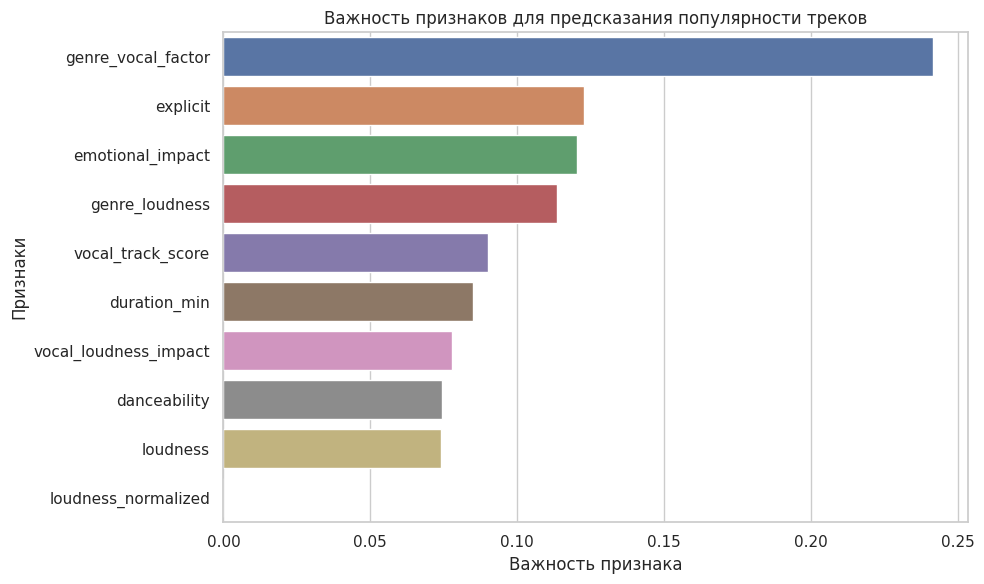

In [44]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Извлечение значимости признаков
feature_importance = best_model.fit(X, y).feature_importances_

# Сортировка признаков по важности
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Печать самых важных признаков
print("\nСамые важные признаки для предсказания популярности треков:")
print(importance_df.head())

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Важность признаков для предсказания популярности треков")
plt.xlabel("Важность признака")
plt.ylabel("Признаки")
plt.tight_layout()
plt.show()


## Вывод по всей работе

### В ходе экспериментов была выявлена наиболее подходящая модель и проведена оценка модели XGBoost для предсказания целевой переменной с использованием 5-фолд кросс-валидации. Метрики производительности оценивались для каждого фолда, а также были рассчитаны их средние значения.

### Итоговые метрики модели, которые удалось достигнуть:

#### Среднеквадратичная ошибка (MSE):

* Средний MSE за 5 фолдов составил 342.18.
* MSE является ключевой метрикой для задач регрессии и показывает, что модель имеет достаточно высокую точность, но возможны дальнейшие улучшения.


#### Средняя абсолютная ошибка (MAE):
* Средний MAE составил 14.11, что указывает на среднее отклонение предсказания от истинного значения на 14.11 единиц.

#### Квадратный корень из MSE (RMSE):
* Средний RMSE составил 18.50, что подтверждает, что ошибки распределены относительно равномерно.

#### Коэффициент детерминации (R²):
* Средний R² составил 0.312, что указывает на то, что модель объясняет около 31.2% дисперсии целевой переменной. Это свидетельствует о необходимости улучшения качества модели.


#### Заключение по исследлванию моделей и метрик:

Модель XGBoost показала умеренные результаты. Однако, учитывая:

* низкое значение R²,
* высокие значения ошибок (MAE, RMSE),
* проблемы с MAPE,

есть возможность для дальнейших улучшений. 

Для повышения качества можно:

* провести дополнительный анализ данных,
* улучшить предварительную обработку данных (например, масштабирование, нормализация),
* оптимизировать гиперпараметры модели,
* попробовать разобрать альтернативные алгоритмы.

#### Итоговый MSE для XGBoost составил 342.78, что является базовым результатом для сравнения с другими моделями.

#### Вывод по важным признакам:

На основании анализа важности признаков, проведенного с использованием модели XGBoost, можно выделить следующие ключевые факторы, которые существенно влияют на предсказание популярности треков:

#### genre_vocal_factor (24.16%)
* Этот признак оказался самым важным для предсказания популярности.
* Он, вероятно, отражает взаимодействие жанра и вокальной составляющей, что указывает на сильное влияние стиля исполнения и вокала на успех трека.

#### explicit (12.27%)
* Указание на наличие нецензурной лексики также играет значимую роль.
* Это может быть связано с целевой аудиторией, так как треки с маркировкой "explicit" зачастую имеют специфическую аудиторию.

#### emotional_impact (12.04%)
* Эмоциональная насыщенность трека напрямую влияет на его восприятие и популярность.
* Треки, вызывающие сильный эмоциональный отклик, имеют больше шансов стать популярными.

#### genre_loudness (11.37%)
* Громкость, характерная для определенных жанров, играет важную роль.
* Это согласуется с тем, что разные жанры имеют свои громкостные особенности, которые могут привлекать аудиторию.

#### vocal_track_score (9.03%)
* Оценка вокального исполнения трека также влияет на популярность.
* Это указывает на важность качества вокала для успешного трека.



#### Заключение:
Результаты анализа показывают, что популярность трека зависит как от характеристик, связанных с жанром и громкостью, так и от эмоциональных и вокальных характеристик. Эти результаты можно использовать для:

* Оптимизации треков перед релизом.
* Формирования рекомендаций для исполнителей и продюсеров.
* Разработки рекомендационных систем на основе данных о предпочтениях пользователей.
